In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
emissions = pd.read_csv('global_csv.csv')
emissions.tail()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28
259,2010,9167,1702,3114,3842,450,59,1.33


In [215]:
emissions1960 = emissions[emissions["Year"] >= 1960]
emission_first = emissions1960.iloc[0]
emission_last = emissions1960.iloc[-1]

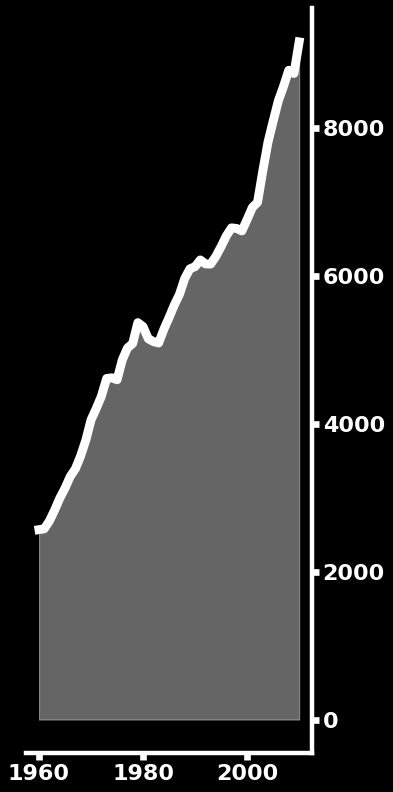

In [203]:
f = plt.figure(figsize=(5, 10), facecolor='black', dpi=80)
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)
ax.set_facecolor("black")

#plt.plot([1960, 2010], [em1960, em2010], '-', linewidth=7, alpha=0.4, color='r')
plt.plot(emissions1960['Year'], emissions1960['Total'], color='w', linewidth=8)
plt.fill_between(emissions1960['Year'], emissions1960['Total'], color='w', alpha=0.4)
#plt.xlim(1960)
#plt.ylim(2000)
#plt.xlabel('Year', fontsize=20, color='w', weight='bold')
#plt.ylabel('Emissions', fontsize=20, color='w', weight='bold')
#plt.title('Global Emissions', weight='bold', color='w', fontsize=20)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)


plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["right"].set_linewidth(4)
plt.gca().spines['right'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
#plt.gca().tick_params(width=4, color='w', length=4)
plt.gca().yaxis.label.set_color('w')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.savefig('emissions.png', transparent=True)

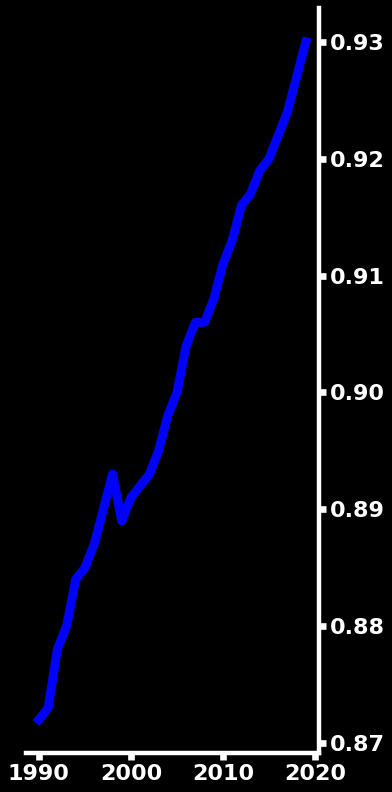

In [216]:
hdi = [0.872, 0.873, 0.878, 0.88, 0.884, 0.885, 0.887, 0.89, 0.893, 0.889, 0.891, 0.892, 0.893, 0.895, 0.898, 0.9, 0.904, 0.906, 0.906, 0.908, 0.911, 0.913, 0.916, 0.917, 0.919, 0.92, 0.922, 0.924, 0.927, 0.93]
year = range(1990, 2020)
hdi_year_first = 1990
hdi_year_last = 2019

f = plt.figure(figsize=(5, 10), facecolor='black', dpi=80)
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)
ax.set_facecolor("black")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["right"].set_linewidth(4)
plt.gca().spines['right'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(year, hdi, color='b', linewidth=8)
#plt.xlim(1990)

plt.tight_layout()
plt.savefig('hdi.png', transparent=True)


In [57]:
em = emissions["Total"].to_numpy()[-20:]
em = em / np.max(em)
hdi_lite = np.array(hdi[-20:])
hdi_lite = hdi_lite / np.max(hdi_lite)
print(len(em), len(hdi_lite))

20 20


In [65]:
print("correlation factor:", np.correlate(em, hdi)/20)

correlation factor: [0.77858986]


In [27]:
ocean_level = pd.read_csv('epa-sea-level_csv.csv')
ocean_level = ocean_level[ocean_level['CSIRO Adjusted Sea Level'].notna()]
ocean_level.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009-03-15,8.586614,8.311024,8.862205,8.046354
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


In [28]:
ocean_level["Year"] = ocean_level['Year'].apply(lambda x: x[:4]).astype(int)
ocean_level["CSIRO Adjusted Sea Level"] = ocean_level["CSIRO Adjusted Sea Level"].apply(lambda x: x * 2.54)
ocean_level["change"] = ocean_level["CSIRO Adjusted Sea Level"] - ocean_level["CSIRO Adjusted Sea Level"].shift(1)
ocean_level.drop(columns=['NOAA Adjusted Sea Level', "Lower Error Bound", "Upper Error Bound"], inplace=True)
ocean_level.tail()

,Year,CSIRO Adjusted Sea Level,change
129,2009,21.81,0.60
130,2010,22.61,0.80
131,2011,22.77,0.16
132,2012,23.69,0.92
133,2013,22.81,-0.88


In [29]:
#mean_sea_level = 3682
#ocean_level["CSIRO Adjusted Sea Level"] = ocean_level["CSIRO Adjusted Sea Level"].apply(lambda x: x * mean_sea_level)

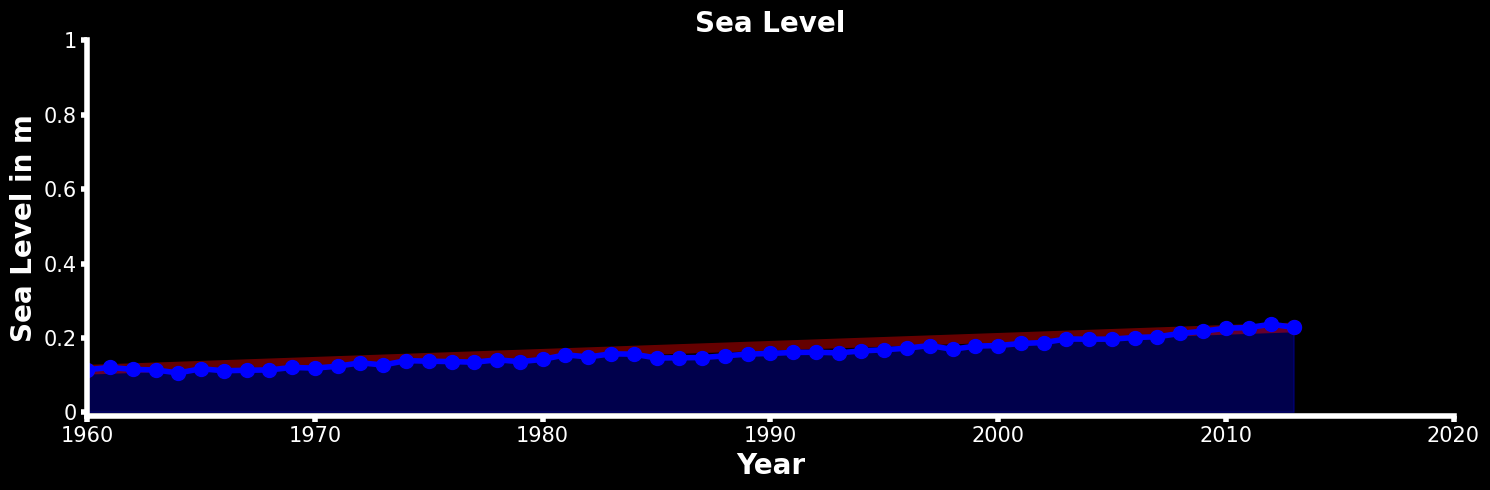

In [30]:
level1960 = ocean_level.loc[ocean_level['Year'] == 1960, 'CSIRO Adjusted Sea Level']
level2013 = ocean_level.loc[ocean_level['Year'] == 2013, 'CSIRO Adjusted Sea Level']

fig = plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")

ax.tick_params(axis='both', colors='white', width=4, length=4, labelsize=15)

plt.plot([1960, 2013], [level1960, level2013], color='r', linestyle='-', marker=".", linewidth=7, alpha=0.4, markersize=20)
plt.plot(ocean_level['Year'], ocean_level['CSIRO Adjusted Sea Level'], color='b', linewidth=4, marker=".", markersize=20)
plt.xlim(1960, 2020)
plt.ylim(-1, 100)
plt.yticks([0,20, 40, 60, 80, 100], ['0', '0.2', '0.4', '0.6', '0.8', '1'])

plt.ylabel('Sea Level in m', fontsize=20, color='w', weight='bold')
plt.xlabel('Year', fontsize=20, color='w', weight='bold')
plt.title('Sea Level', fontsize=20, color='w', weight='bold')

plt.fill_between(ocean_level['Year'], ocean_level['CSIRO Adjusted Sea Level'], color='b', alpha=0.3)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().yaxis.label.set_color('w')

plt.tight_layout()
#plt.savefig('sea_level.png', transparent=True)

In [151]:
ocean_level1960 = ocean_level[ocean_level["Year"] >= 1960]
ocean_level_mean = ocean_level1960["CSIRO Adjusted Sea Level"].mean()

# closest datpoint closest to the mean every 5 years
ocean_level1960["diff"] = ocean_level1960["CSIRO Adjusted Sea Level"] - ocean_level_mean
ocean_level1960["diff"] = ocean_level1960["diff"].abs()
ocean_level_5 = ocean_level1960.sort_values(by="diff")
ocean_level_5 = ocean_level_5[~ocean_level_5["diff"].duplicated()]
ocean_level_5 = ocean_level_5[::5]

ocean_level_5 = ocean_level_5[["Year", "CSIRO Adjusted Sea Level"]]
ocean_level_5 = ocean_level_5.sort_values(by="Year")

# drop last entry
ocean_level_5 = ocean_level_5[:-1]

ocean_level_5["CSIRO Adjusted Sea Level"] = ocean_level_5["CSIRO Adjusted Sea Level"].apply(lambda x: x + 20)

len(ocean_level_5)

10

In [217]:
ocean_level_first = ocean_level_5.iloc[0]
ocean_level_last = ocean_level_5.iloc[-1]
ocean_level_5.tail()

,Year,CSIRO Adjusted Sea Level
105,1985,34.60
110,1990,35.83
111,1991,36.09
119,1999,37.81
125,2005,39.67


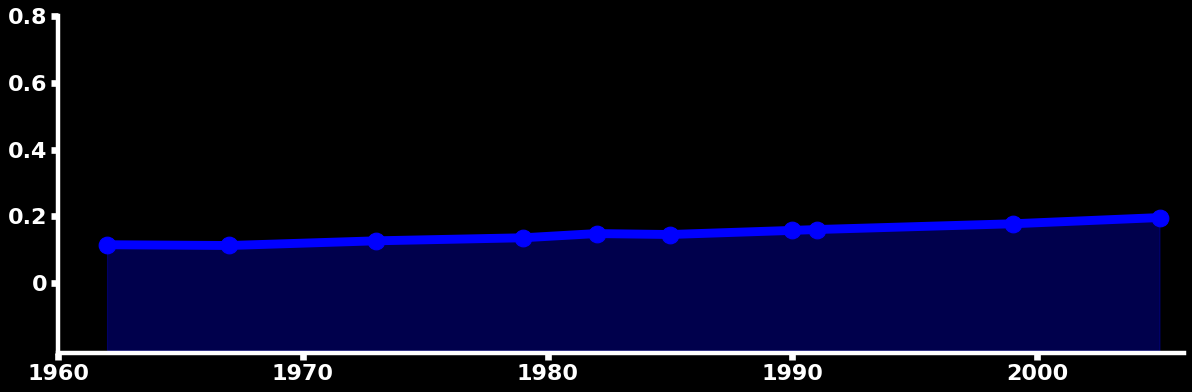

In [202]:
fig = plt.figure(figsize=(15, 5), facecolor='black', dpi=80)
ax = plt.axes()
ax.set_facecolor("black")

ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)

#plt.plot([1960, 2013], [level1960, level2013], color='r', linestyle='-', marker=".", linewidth=7, alpha=0.4, markersize=20)
plt.plot(ocean_level_5['Year'], ocean_level_5['CSIRO Adjusted Sea Level'], color='b', linewidth=8, marker=".", markersize=30)
plt.xlim(1960, 2006)
plt.ylim(-1, 100)
plt.yticks([20,40, 60, 80, 100], ['0', '0.2', '0.4', '0.6', '0.8'])

#plt.ylabel('Sea Level in m', fontsize=20, color='w', weight='bold')
#plt.xlabel('Year', fontsize=20, color='w', weight='bold')
#plt.title('Sea Level', fontsize=20, color='w', weight='bold')

plt.fill_between(ocean_level_5['Year'], ocean_level_5['CSIRO Adjusted Sea Level'], color='b', alpha=0.3)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().yaxis.label.set_color('w')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.savefig('sea_level.png', transparent=True)

In [67]:
emissions_short = emissions[(emissions['Year'] > 1960) & (emissions['Year'] <= 2010)]['Total'].to_numpy()
emissions_short = emissions_short / np.max(emissions_short)
ocean_level_short = ocean_level[(ocean_level['Year'] > 1960) & (ocean_level['Year'] <= 2010)]['CSIRO Adjusted Sea Level'].to_numpy()
ocean_level_short = ocean_level_short / np.max(ocean_level_short)

np.correlate(emissions_short, ocean_level_short) / len(emissions_short)

array([0.4446721])

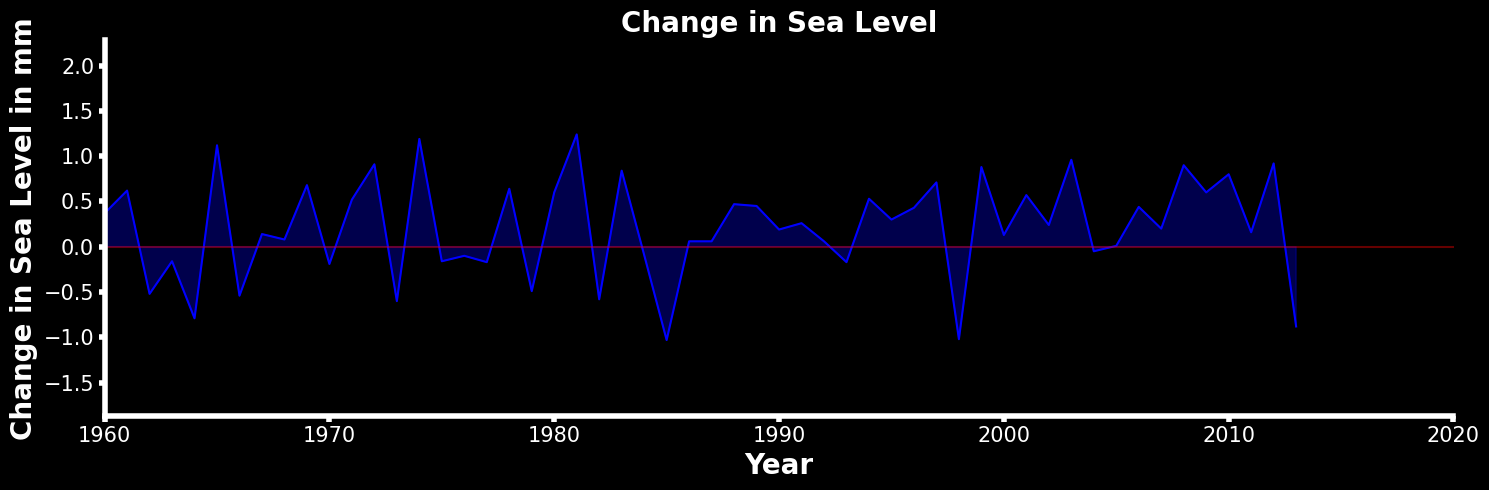

In [31]:
plt.figure(figsize=(15, 5), facecolor="black")
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=4, length=4, labelsize=15)

plt.plot(ocean_level['Year'], ocean_level['change'], color='b')
plt.axhline(0, color='r', linestyle='-', alpha=0.4)
plt.fill_between(ocean_level['Year'], ocean_level['change'], color='b', alpha=0.3)

plt.xlim(1960, 2020)

plt.xlabel('Year', fontsize=20, color='w', weight='bold')
plt.ylabel('Change in Sea Level in mm', fontsize=20, color='w', weight='bold')
plt.title('Change in Sea Level', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

plt.tight_layout()
plt.savefig('sea_level_change.png', transparent=True)

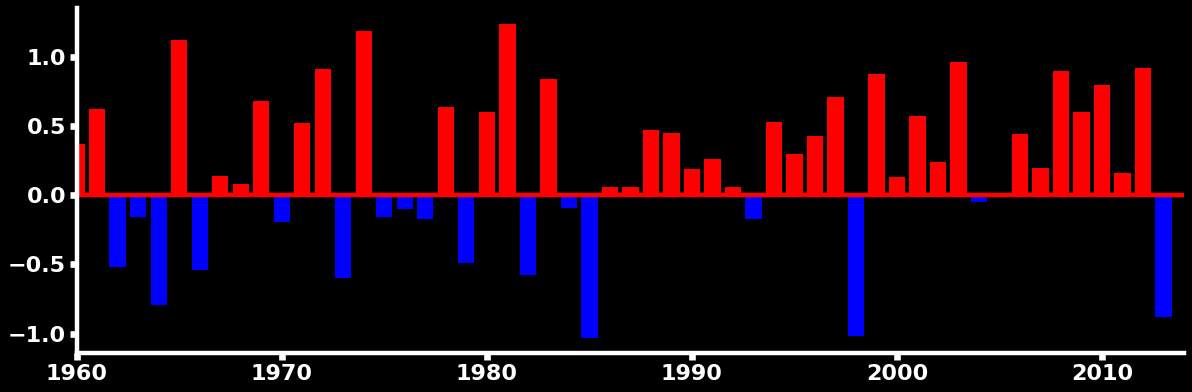

In [201]:
c = ["r" if x > 0 else "b" for x in ocean_level['change']]

plt.figure(figsize=(15, 5), facecolor="black", dpi=80)
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)

plt.bar(ocean_level['Year'], ocean_level['change'], color=c)
plt.axhline(0, color='r', linestyle='-', linewidth=4)
#plt.fill_between(ocean_level['Year'], ocean_level['change'], color='b', alpha=0.3)

plt.xlim(1960, 2014)

#plt.xlabel('Year', fontsize=20, color='w', weight='bold')
#plt.ylabel('Change in Sea Level in mm', fontsize=20, color='w', weight='bold')
#plt.title('Change in Sea Level', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.savefig('sea_level_change.png', transparent=True)

In [32]:
# but data into bins of 20 years
ocean_level_bin = ocean_level.groupby(ocean_level.index // 20).mean()
ocean_level_bin.tail()


,Year,CSIRO Adjusted Sea Level,change
2,1929.5,5.451000,0.123500
3,1949.5,9.087500,0.194500
4,1969.5,12.372000,0.127500
5,1989.5,15.901000,0.209500
6,2006.5,20.682857,0.357143


In [33]:
for i in range(0, int(len(ocean_level)/20)):
    print(ocean_level["Year"].loc[i*20])
    print(ocean_level["Year"].loc[i*20+19])

1880
1899
1900
1919
1920
1939
1940
1959
1960
1979
1980
1999


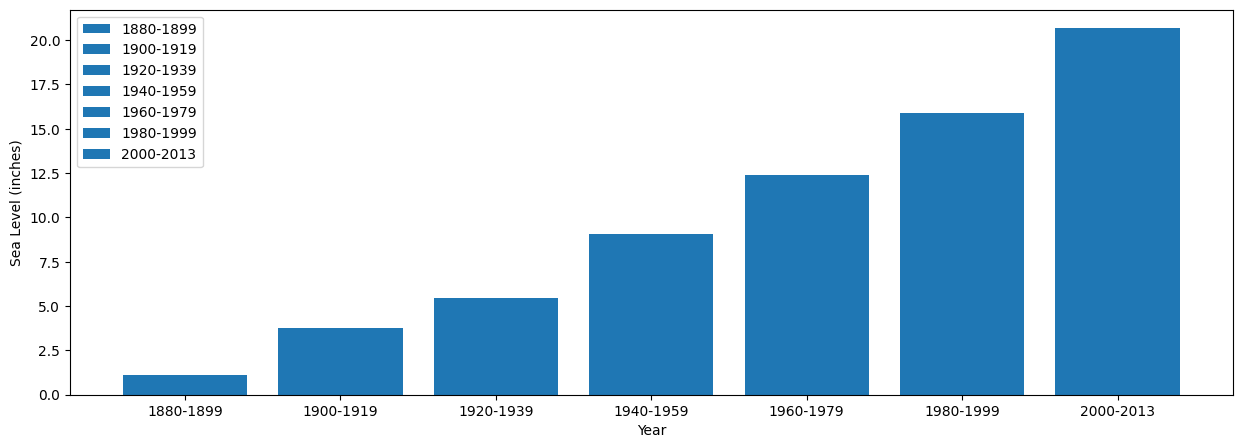

In [34]:
labels = ["1880-1899", "1900-1919", "1920-1939", "1940-1959", "1960-1979", "1980-1999", "2000-2013"]

fig = plt.figure(figsize=(15, 5))
plt.bar(range(7), ocean_level_bin['CSIRO Adjusted Sea Level'], label=labels)
plt.xticks(range(7), labels)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()

In [35]:
temp = pd.read_csv('global-temp-annual_csv.csv')
temp["Year"] = temp['Year'].apply(lambda x: x[:4]).astype(int)
temp.drop(columns=['Land',"N Hem", "S Hem", "Band 1", "Band 2", "Band 3"], inplace=True)
temp["change"] = temp["Land and Ocean"] - temp["Land and Ocean"].shift(1)
temp.tail()

,Year,Land and Ocean,change
130,2010,0.66,0.07
131,2011,0.55,-0.11
132,2012,0.57,0.02
133,2013,0.60,0.03
134,2014,0.68,0.08


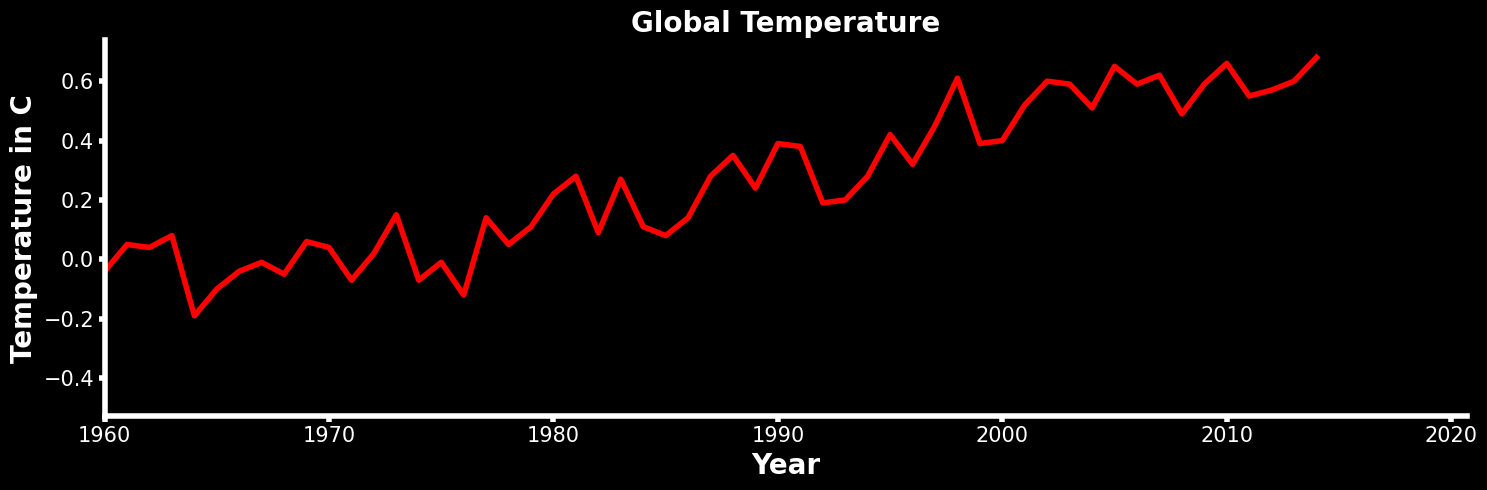

In [157]:
plt.figure(figsize=(15, 5), facecolor="black")
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=4, length=4, labelsize=15)

#plt.axhline(y=temp['Land and Ocean'].where(temp['Year'] >= 1960).mean(), color='r', linestyle='-', linewidth=7, alpha=0.4)
plt.plot(temp['Year'], temp['Land and Ocean'], color='r', linewidth=4)
plt.xlim(1960)
plt.ylim(-1, 30)

plt.ylabel('Temperature in C', fontsize=20, color='w', weight='bold')
plt.xlabel('Year', fontsize=20, color='w', weight='bold')
plt.title('Global Temperature', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

plt.tight_layout()
#plt.savefig('temperature.png', transparent=True)

In [218]:
temp1960 = temp[temp["Year"] >= 1960]
temp_mean = temp1960["Land and Ocean"].mean()
print(temp_mean)

# in a step of 5 years, choose the datapoint with the smallest difference to the mean
# and add 20 to it
temp1960["diff"] = temp1960["Land and Ocean"] - temp_mean

temp_5 = temp1960.sort_values(by="diff")
temp_5 = temp_5[~temp_5["diff"].duplicated()]
temp_5 = temp_5[::5]

temp_5 = temp_5[["Year", "Land and Ocean"]]
temp_5 = temp_5.sort_values(by="Year")

#temp_5["Land and Ocean"] = temp_5["Land and Ocean"].apply(lambda x: x + 20)
temp_first = temp_5.iloc[0]
temp_last = temp_5.iloc[-1]
len(temp_5)

0.2609090909090909


/tmp/ipykernel_161425/3544379359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1960["diff"] = temp1960["Land and Ocean"] - temp_mean


9

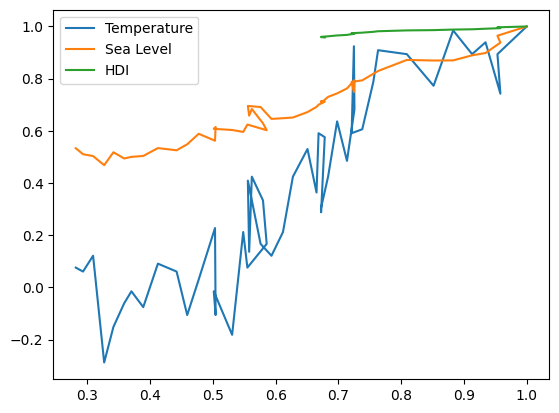

In [265]:
ems = emissions[(emissions['Year'] > 1960) & (emissions['Year'] <= 2010)]['Total'].to_numpy() / emissions[(emissions['Year'] > 1960) & (emissions['Year'] <= 2010)]['Total'].max()

plt.plot(ems,
          temp[(temp['Year'] > 1960) & (temp['Year'] <= 2010)]["Land and Ocean"].to_numpy() / temp[(temp['Year'] > 1960) & (temp['Year'] <= 2010)]["Land and Ocean"].max(),
          label="Temperature")

plt.plot(ems,
          ocean_level[(ocean_level['Year'] > 1960) & (ocean_level['Year'] <= 2010)]['CSIRO Adjusted Sea Level'].to_numpy() / ocean_level[(ocean_level['Year'] > 1960) & (ocean_level['Year'] <= 2010)]['CSIRO Adjusted Sea Level'].max(),
          label="Sea Level")

plt.plot(ems[-20:],
         np.array(hdi[-20:]) / np.array(hdi[-20:]).max(),
         label = "HDI")

plt.legend()



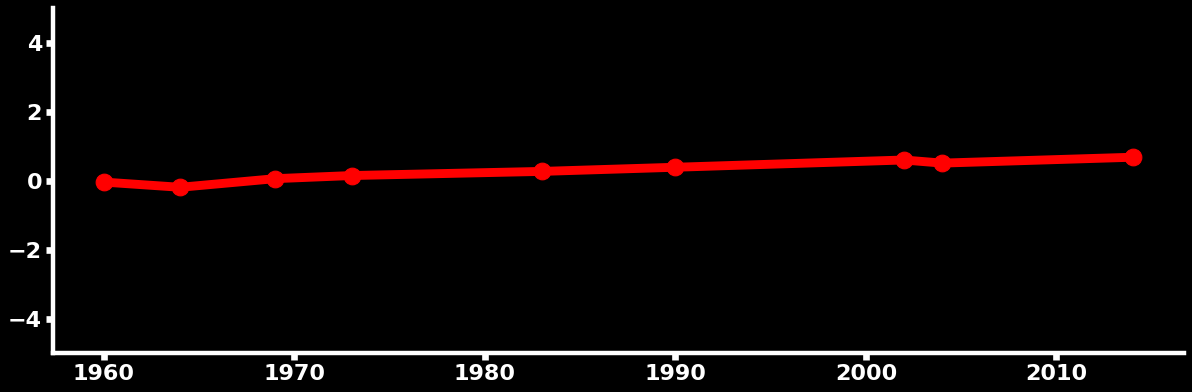

In [200]:
plt.figure(figsize=(15, 5), facecolor="black", dpi=80)
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)

#plt.axhline(y=temp['Land and Ocean'].where(temp['Year'] >= 1960).mean(), color='r', linestyle='-', linewidth=7, alpha=0.4)
plt.plot(temp_5['Year'], temp_5['Land and Ocean'], color='r', linewidth=8, marker=".", markersize=30)
#plt.xlim(1960)
plt.ylim(-5, 5)

#plt.ylabel('Temperature in C', fontsize=20, color='w', weight='bold')
#plt.xlabel('Year', fontsize=20, color='w', weight='bold')
#plt.title('Global Temperature', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.savefig('temperature.png', transparent=True)

In [68]:
emissions_short = emissions[(emissions['Year'] > 1960) & (emissions['Year'] <= 2010)]['Total'].to_numpy()
emissions_short = emissions_short / np.max(emissions_short)

temp_short = temp[(temp['Year'] > 1960) & (temp['Year'] <= 2010)]['Land and Ocean'].to_numpy()
temp_short = temp_short / np.max(temp_short)

np.correlate(emissions_short, temp_short) / len(emissions_short)

array([0.28201622])

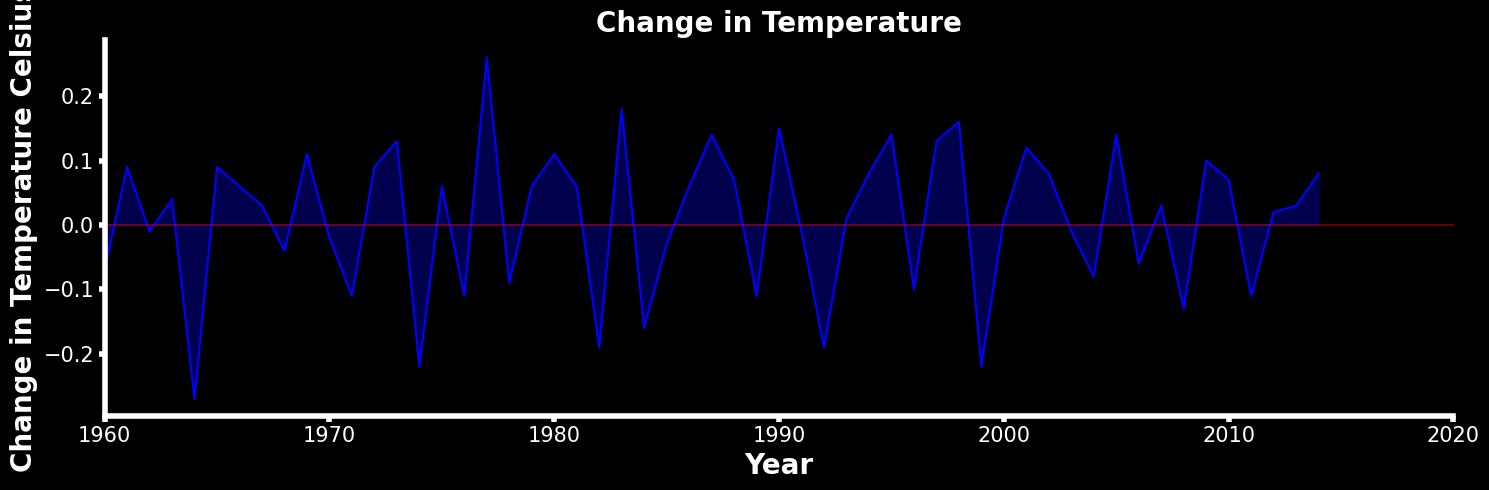

In [37]:
plt.figure(figsize=(15, 5), facecolor="black")
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=4, length=4, labelsize=15)

plt.plot(temp['Year'], temp['change'], color='b')
plt.axhline(0, color='r', linestyle='-', alpha=0.4)
plt.fill_between(temp['Year'], temp['change'], color='b', alpha=0.3)
plt.xlim(1960, 2020)
plt.xlabel('Year', fontsize=20, color='w', weight='bold')
plt.ylabel('Change in Temperature Celsius', fontsize=20, color='w', weight='bold')
plt.title('Change in Temperature', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

plt.tight_layout()
plt.savefig('temperature_change.png', transparent=True)

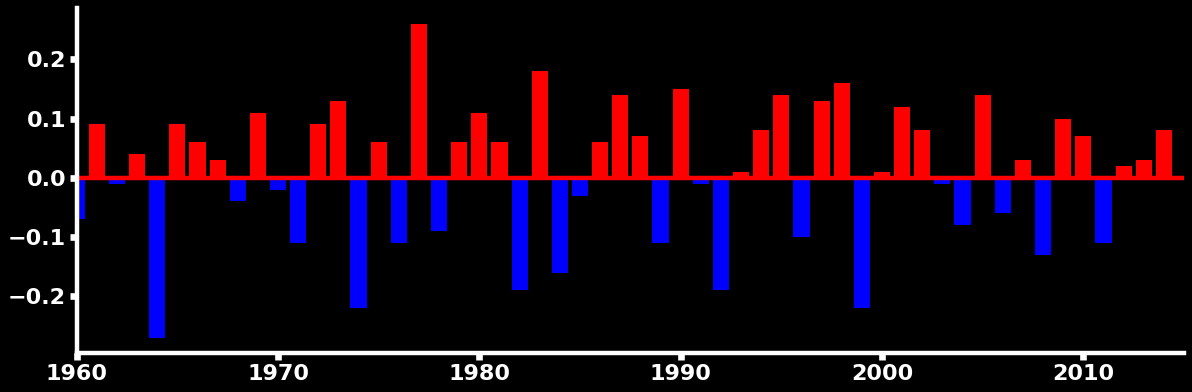

In [198]:
c = ["r" if x > 0 else "b" for x in temp['change']]

plt.figure(figsize=(15, 5), facecolor="black", dpi=80)
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='both', colors='white', width=6, length=6, labelsize=20)

plt.bar(temp['Year'], temp['change'], color=c)
plt.axhline(0, color='r', linestyle='-', linewidth=4)
#plt.fill_between(temp['Year'], temp['change'], color='b', alpha=0.3)
plt.xlim(1960, 2015)
#plt.xlabel('Year', fontsize=20, color='w', weight='bold')
#plt.ylabel('Change in Temperature C°', fontsize=20, color='w', weight='bold')
#plt.title('Change in Temperature', fontsize=20, color='w', weight='bold')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().spines["bottom"].set_linewidth(4)
plt.gca().spines["left"].set_linewidth(4)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.gca().yaxis.label.set_color('w')

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.savefig('temperature_change.png', transparent=True)

In [227]:
e = [emission_first["Total"], emission_last["Total"]]
ye = [emission_first["Year"], emission_last["Year"]]
ep = emission_last["Total"] / emission_first["Total"]

t = [temp_first["Land and Ocean"], temp_last["Land and Ocean"]]
yt = [temp_first["Year"], temp_last["Year"]]
tp = temp_last["Land and Ocean"] / temp_first["Land and Ocean"]
print(tp)

s = [ocean_level_first["CSIRO Adjusted Sea Level"], ocean_level_last["CSIRO Adjusted Sea Level"]]
ys = [ocean_level_first["Year"], ocean_level_last["Year"]]
sp = ocean_level_last["CSIRO Adjusted Sea Level"] / ocean_level_first["CSIRO Adjusted Sea Level"]

h = [hdi[0], hdi[-1]]
yh = [hdi_year_first, hdi_year_last]
hp = hdi[-1] / hdi[0]

X = [0, 0, 0, 0]
Y = [0, 0, 0, 0]
U = [1, 1, 1, 1]
V = [ep, tp, sp, hp]


-17.0


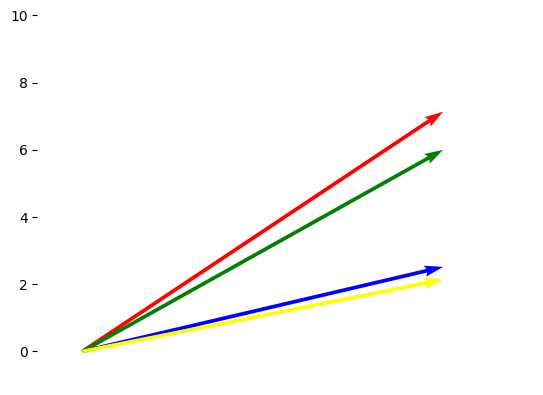

In [269]:
plt.figure()
ax = plt.gca()
ax.quiver([0], [0], 8, [ep*2], angles='xy', scale_units='xy', scale=1, color=['red'], label="Emissions")
ax.quiver([0], [0], 8, [3*2], angles='xy', scale_units='xy', scale=1, color=['green'], label="Temperature")
ax.quiver([0], [0], 8, [sp*2], angles='xy', scale_units='xy', scale=1, color=['blue'], label="Sea Level")
ax.quiver([0], [0], 8, [hp*2], angles='xy', scale_units='xy', scale=1, color=['yellow'], label="HDI")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 

ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])

plt.savefig('quiver.png', transparent=True)

#plt.legend()

In [225]:
0.98 / 0.8

1.2249999999999999

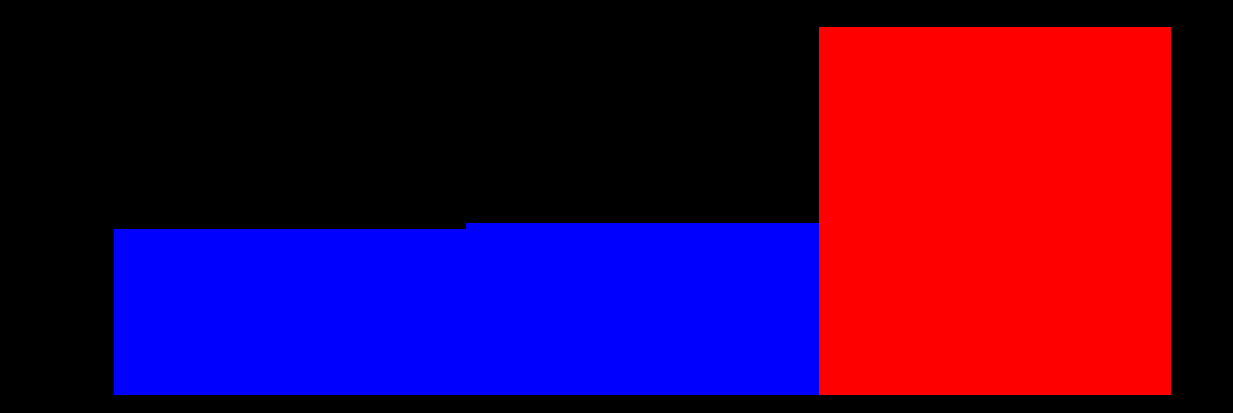

In [94]:
labels = ["Temperature", "Sealevel", "Emissions"]
data = [0.28, 0.44-0.15, 0.77-0.15]
colors = ['b', 'b', 'r']

fig = plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")

p = ax.bar(range(3), data, 1, label=labels, color=colors)
#ax.bar_label(p, label_type='center', color='w', weight='bold')

#plt.xticks(range(3), labels)
#plt.xlabel('Year')
plt.ylabel('Emission correlation')
plt.ylim(0, 0.65)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
#plt.legend()

plt.savefig('correlation.png', transparent=True)